In [1]:
%matplotlib inline
import plot
import market
import metrics
from decimal import Decimal
import datetime
from dateutil.relativedelta import relativedelta

In [2]:
m = market.US_1871_Monthly()
months = 1 * 12
start_year = datetime.date(1871, 1, 1)
print(start_year + relativedelta(months=1))

1871-02-01


In [3]:
start_year = 1966
length = 30
last_year = 1966

start_date = datetime.date(start_year, 1, 1)
last_date = datetime.date(last_year, 12, 1)

def run(stock_pct):
    swrs = []
    date = start_date
    while date <= last_date:
        returns = []
        for annual_returns in m.iter_from(date, length=length*12):
            stocks = annual_returns.stocks - annual_returns.inflation
            bonds = annual_returns.bonds - annual_returns.inflation
            returns.append((stocks * stock_pct) + (bonds * (1-stock_pct)))

        monthly_swr = float(metrics.ssr(returns))
        annual_swr = ((1 + monthly_swr) ** 12) - 1
        swrs.append(annual_swr)
        
        date += relativedelta(months=1)
        
    return swrs

run(Decimal('.6'))

[0.04325133922600943,
 0.042798071939409654,
 0.04323029135325829,
 0.044454403376053,
 0.04387918382500677,
 0.04530693753964088,
 0.04565424737142321,
 0.04587090485441658,
 0.04794940760911537,
 0.049015141272066076,
 0.04950676028190215,
 0.04800560903704931]

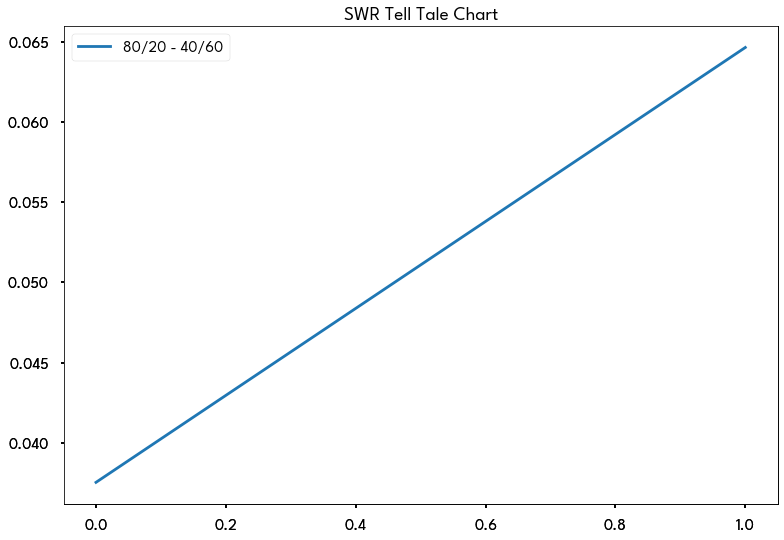

In [4]:
six = run(Decimal('.6'))
four = run(Decimal('.4'))
eight = run(Decimal('.8'))

diff = filter(lambda x: x>0, [(x[0] - x[1])*100 for x in zip(eight, four)])

#plot.plot_n({'80/20': eight, '40/60' : four}, '', 'Safe Withdrawal Rate by Year', add_commas=False)
plot.plot_n({'80/20 - 40/60' : list(diff)}, '', 'SWR Tell Tale Chart', add_commas=False, zero_based=False)